## scikit-learn中的多项式回归和Pipeline

In [22]:
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)
# print(X)
# print(y)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [26]:
X2.shape

(100, 3)

In [27]:
X[:5,:]

array([[ 0.46632408],
       [ 1.57105151],
       [-0.64519924],
       [-0.59296985],
       [ 0.03351049]])

In [28]:
X2[:5,:]

array([[ 1.00000000e+00,  4.66324076e-01,  2.17458144e-01],
       [ 1.00000000e+00,  1.57105151e+00,  2.46820286e+00],
       [ 1.00000000e+00, -6.45199240e-01,  4.16282059e-01],
       [ 1.00000000e+00, -5.92969852e-01,  3.51613246e-01],
       [ 1.00000000e+00,  3.35104945e-02,  1.12295324e-03]])

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

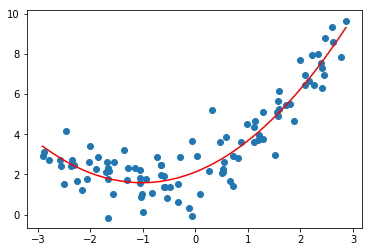

In [30]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [31]:
lin_reg2.coef_

array([0.        , 1.04352641, 0.51056705])

In [32]:
lin_reg2.intercept_

2.1225781533987123

### 关于PolynomialFeatures

In [34]:
X = np.arange(1, 11).reshape(-1, 2)

In [35]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [36]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [37]:
X2.shape

(5, 6)

In [38]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline

In [39]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [40]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

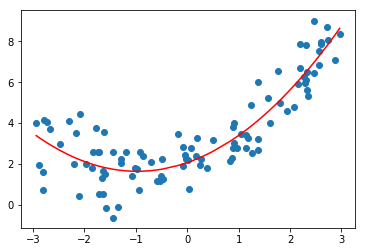

In [41]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()